Generating plots
X Mean
-0.203591818573
X True
-0.206437703587
X Error
0.0028458850142
Y Mean
1.27324946455
Y True
1.23179550582
Y Error
0.041453958736
X Var
1.08807010408
Y Var
2.98447239424
1.0908919089
Done


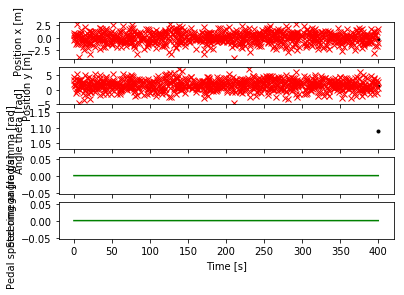

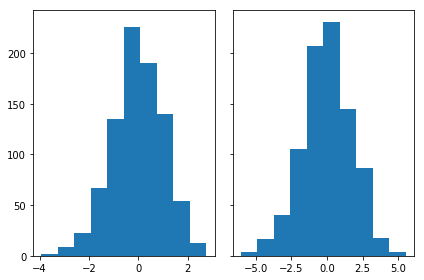

In [31]:
%reset -f
%matplotlib inline
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

#provide the index of the experimental run you would like to use.
# Note that using "0" means that you will load the measurement calibration data.
experimentalRun = 0
experimentalData = np.genfromtxt ('data/run_{0:03d}.csv'.format(experimentalRun), delimiter=',')


print('Generating plots')
figHist, axHist = plt.subplots(5, 1, sharex=True)
axHist[0].plot(experimentalData[:,0], experimentalData[:,5], 'k:.', label='true')
axHist[0].plot(experimentalData[:,0], experimentalData[:,3], 'rx', label='Meas')


axHist[1].plot(experimentalData[:,0], experimentalData[:,6], 'k:.', label='true')
axHist[1].plot(experimentalData[:,0], experimentalData[:,4], 'rx', label='Meas')


axHist[2].plot(experimentalData[:,0], experimentalData[:,7], 'k:.', label='true')

axHist[3].plot(experimentalData[:,0], experimentalData[:,1], 'g-', label='m')
axHist[4].plot(experimentalData[:,0], experimentalData[:,2], 'g-', label='m')

axHist[-1].set_xlabel('Time [s]')
axHist[0].set_ylabel('Position x [m]')
axHist[1].set_ylabel('Position y [m]')
axHist[2].set_ylabel('Angle theta [rad]')
axHist[3].set_ylabel('Steering angle gamma [rad]')
axHist[4].set_ylabel('Pedal speed omega [rad/s]')

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
theta = experimentalData[-1,7]
xvalid = experimentalData[:,3][np.isfinite(experimentalData[:,3])] - 1/2 * 0.8 * np.cos(theta)
yvalid = experimentalData[:,4][np.isfinite(experimentalData[:,4])] - 1/2 * 0.8 * np.sin(theta)

xmean = np.mean(xvalid)
ymean = np.mean(yvalid)
print 'X Mean'
print xmean
print 'X True'
print experimentalData[-1,5]
print 'X Error'
print xmean - experimentalData[-1,5]
print 'Y Mean'
print ymean
print 'Y True'
print experimentalData[-1,6]
print 'Y Error'
print ymean - experimentalData[-1,6]
print 'X Var'
print np.var(xvalid)
print 'Y Var'
print np.var(yvalid)
axs[0].hist(xvalid - xmean , bins=10)
axs[1].hist(yvalid - ymean, bins=10)

print experimentalData[-1,7]

print('Done')
plt.show()

In [40]:
x = 0.0
y = 0.0
theta = np.pi/4.0

N = 5000

state = np.array([x,y,theta])

x_std = np.sqrt(2.5)
y_std = np.sqrt(2.5)
theta_std = np.pi/8.0

particles = np.random.multivariate_normal(np.array([x,y,theta]), np.diag([x_std, y_std, theta_std]), N)
print particles.shape
print particles

(5000, 3)
[[-1.92022107  0.57951496  0.81367213]
 [-0.69169442  1.61734164  1.10854943]
 [ 1.23388412  1.96810009  0.75143739]
 ..., 
 [-0.4539681   0.76508516  1.49439026]
 [-0.49371529  1.61654389  2.26446072]
 [ 0.82401414 -0.90717857  0.70909955]]


In [45]:
def max_diff_angles(angles):
    angles = np.mod(angles, 2.0*np.pi)
    idx_larger_pi = angles > np.pi
    angles[idx_larger_pi] = (2.0*np.pi) - angles[idx_larger_pi]
    return np.max(angles) - np.min(angles)

max_diff_angles(np.array([0.0, np.pi/2, np.pi/3, 5/4*np.pi]))

2.3561944901923448